In [2]:
import json
import random
import cv2
import matplotlib.pyplot as plt
from glob import glob
import os
import sys
import numpy as np
from PIL import Image
from tqdm.notebook import tqdm
import pandas as pd
import os

In [3]:
# df = pd.read_csv('./EfficientDet/efficientdet_submission_50.csv')
# df = pd.read_csv('./Ensemble/submission/first.csv')
df = pd.read_csv('./EfficientDet/efficentdet.csv')

df

,PredictionString,image_id
0,7 0.92525524 593.2569 518.16968 959.7055 1020....,test/0000.jpg
1,3 0.9136112 343.67408 231.10358 754.5736 692.7...,test/0001.jpg
2,1 0.7922737 84.31262 288.7854 379.67704 596.7024,test/0002.jpg
3,9 0.6170259 134.5907 222.69104 961.03772 820.9...,test/0003.jpg
4,1 0.7484904 231.797 310.40662 892.1466 772.56372,test/0004.jpg
...,...,...
4866,1 0.90773267 292.61274 392.67028 672.1436 695....,test/4866.jpg
4867,3 0.8702601 407.10828 315.2676 783.66492 705.6...,test/4867.jpg
4868,7 0.79673046 120.129486 472.97888 634.12232 83...,test/4868.jpg
4869,9 0.52870286 25.288788 212.27798 1045.2882 955...,test/4869.jpg


In [4]:
def get_file_path(json_file, image_num):
    file_path = json_file['images'][image_num]['file_name']
    return file_path

def read_image(dataset_path, file_path):
    image = cv2.imread(dataset_path + file_path, cv2.IMREAD_COLOR)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

def get_annotations(df, image_num):
    # anns = [ann for ann in json_file['annotations'] if ann['image_id'] == image_num]
    labels = []
    anns = []
    ann = []
    if type(df.loc[image_num]['PredictionString']) == float:
        return anns
    
    cur_df = df.loc[image_num]['PredictionString'].split()
    for j, _ in enumerate(cur_df):
        if j % 6 == 0:
            labels.append(int(cur_df[j]))
        elif j % 6 == 1:
            continue
        else:
            ann.append(float(cur_df[j]))
            if len(ann) == 4:
                anns.append(ann)
                ann = []
    return anns, labels

def plot_bbox(image, anns, labels):
    classes = ("General trash", "Paper", "Paper pack", "Metal", "Glass", 
           "Plastic", "Styrofoam", "Plastic bag", "Battery", "Clothing")
    for ann, label in zip(anns, labels):
        color = list(np.random.random(size=3) * 256)
        xmin, ymin, xmax, ymax = ann
        image = cv2.putText(image, classes[label], (int((xmin)), int((ymin+ymax)/2)), cv2.FONT_HERSHEY_SIMPLEX, 2, color, 3)
        image = cv2.rectangle(image, (int(xmin),int(ymin)), (int(xmax), int(ymax)), color, 3)
    plt.figure(figsize=(10,10))
    plt.imshow(image)
    
def plot_box(image):
    plt.figure(figsize=(10,10))
    plt.imshow(image)

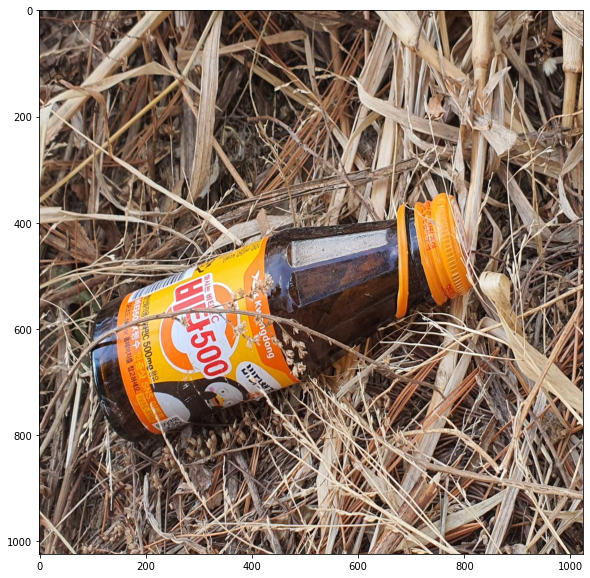

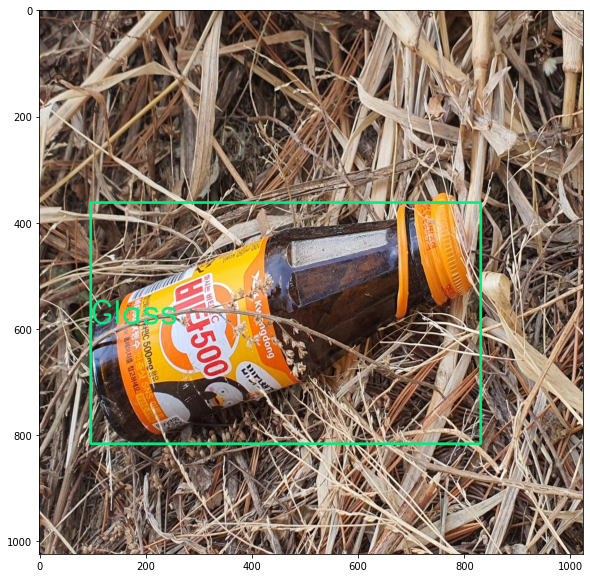

In [7]:
with open('./dataset/test.json','r') as f:
    test_json = json.load(f)
dataset_path = './dataset/'

image_number = 2059
file_path = get_file_path(test_json, image_number)
anns, labels = get_annotations(df, image_number)
image = read_image(dataset_path, file_path)
plot_box(image)
plot_bbox(image, anns, labels)
